In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
df=pd.read_csv(r"F:\datasets\Loan-Prediction-Dataset\nloan.csv")

In [3]:
# Dropping unecessary colums
df.drop(['Loan_ID','Gender','Dependents','Married','Loan_Amount_Term'],1,inplace=True)

In [4]:
# Shape of dataset
df.shape

(614, 9)

In [5]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
Education                 614 non-null object
Self_Employed             582 non-null object
ApplicantIncome           614 non-null int64
CoapplicantIncome         614 non-null float64
LoanAmount                592 non-null float64
Credit_History            564 non-null float64
Loan_Amount_term_Years    614 non-null int64
Property_Area             614 non-null object
Loan_Status               614 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 33.6+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Amount_term_Years
count,614.000000,614.000000,592.000000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,0.842199,27.850163
std,6109.041673,2926.248369,85.587325,0.364878,6.848657
min,150.000000,0.000000,9.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,1.000000,30.000000
50%,3812.500000,1188.500000,128.000000,1.000000,30.000000
75%,5795.000000,2297.250000,168.000000,1.000000,30.000000
max,81000.000000,41667.000000,700.000000,1.000000,40.000000


In [7]:
# Splitting features into numerical and categorical features
numerical_feat=[features for  features in df.columns if df[features].dtypes!='O']
categorical_feat=[features for  features in df.columns if df[features].dtypes=='O']

In [8]:
# Splitting numerical features into discrete and continous features
discrete_feat=[features for features in numerical_feat if len(df[features].unique())<25]
continous_feat=[features for features in numerical_feat if features not in discrete_feat]

In [9]:
# Checking for NULL values in categorical features
df[categorical_feat].isnull().sum()

Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [10]:
# Handling missing values in categorical features
df['Self_Employed'].fillna('Missing',inplace=True)

In [11]:
# Checking for NULL values in discrete features
df[discrete_feat].isnull().sum()

Credit_History            50
Loan_Amount_term_Years     0
dtype: int64

In [12]:
# Handling missing values in discrete features
df['Credit_History'].fillna('0',inplace=True)

In [13]:
# Checking for NULL values in continous features
df[continous_feat].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [14]:
# Handling missing values in continous features
ml=df['LoanAmount'].median()
df['LoanAmount'].fillna(ml,inplace=True)

C:\Users\Mudit Singh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


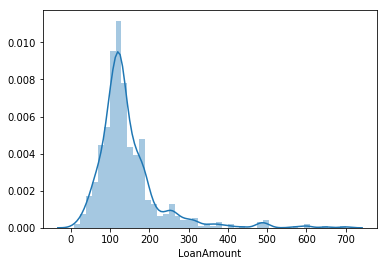

In [15]:
# Distribution of continous features
sns.distplot(df['LoanAmount'])

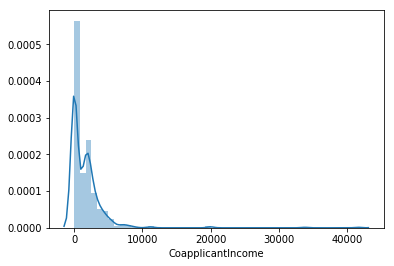

In [16]:
sns.distplot(df['CoapplicantIncome'])

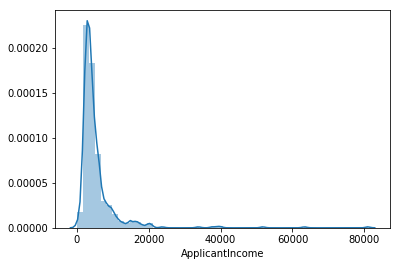

In [17]:
sns.distplot(df['ApplicantIncome'])

In [18]:
# Applying log transformation to convert skewed distribution to Gaussian distribution
for feature in continous_feat:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])

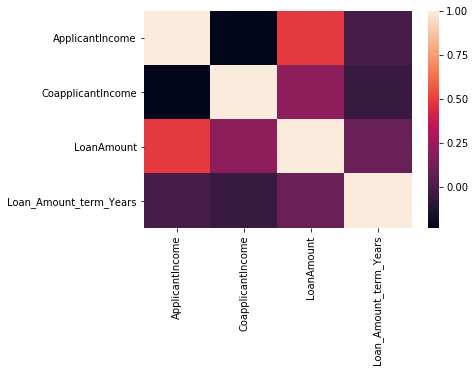

In [19]:
# Finding correlation
correlation=df.corr()
sns.heatmap(correlation)

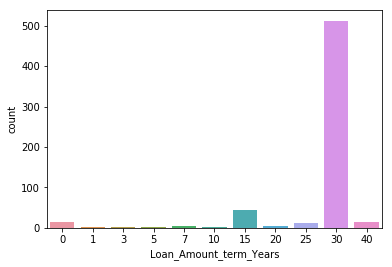

In [20]:
# Count of Loan amount term in years
sns.countplot(df['Loan_Amount_term_Years'])

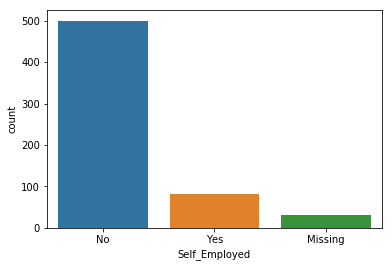

In [97]:
# Count of self-Employed people
sns.countplot(df['Self_Employed'])

In [23]:
# Spiltting of dataset into independent and dependent features
x=df.drop(['Loan_Status'],1)
y=df['Loan_Status']

In [24]:
# Creating dummy variables for categorical features
d1=pd.get_dummies(x['Education'],drop_first=True)
d2=pd.get_dummies(x['Self_Employed'],drop_first=True)
d3=pd.get_dummies(x['Property_Area'],drop_first=True)

In [25]:
x.drop(['Education','Self_Employed','Property_Area'],1,inplace=True)

In [26]:
# Combining dummy variables with independent features
x=pd.concat([x,d1,d2,d3],1)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [28]:
# Splitting independent features into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
# Applying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=30,n_jobs=-1,random_state=0)
cls.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
# Predicting result
y_pred=cls.predict(x_test)

In [69]:
# Checking for accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(y_test,y_pred)

In [70]:
# Confusion matrix
confusion_matrix(y_test,y_pred)

array([[18, 15],
       [12, 78]], dtype=int64)